## Multilayer Perceptron (Deep Neural Network)

Task: Build a multilayer perceptron from scratch and implement for the [Fashion MNIST](https://www.tensorflow.org/datasets/catalog/fashion_mnist) classification problem. 
- The Fashion MNIST is multi class problem. The dataset contains 10 classes which represent different fashion products. 
- The neural network should be able to predict the fashion category of the product when given an image.
- A description of each label is given as:
 
**Label:Description**

    0:T-shirt/top
    1:Trouser
    2:Pullover
    3:Dress
    4:Coat
    5:Sandal
    6:Shirt
    7:Sneaker
    8:Bag
    9:Ankle boot

In [80]:
# Import packages 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#### Import Dataset
We'll use `tensorflow.keras.datasets` to import the `fashion_mnist` dataset.

In [81]:
# Use the keras module to import the necessary data 
from tensorflow.keras.datasets import fashion_mnist
# load data as test/train and image/label sets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

#### Data Stats
- The images are 28x28
- Training set has 60000 images
- Test set has 10000 images
- There are 10 classes namely: 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'

In [82]:
#print some data stats
print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)
print('Number of classes:', len(np.unique(y_train)))

Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)
Number of classes: 10


#### Data Visualization
The figures show some of the images from the training dataset and their respective labels. 
- The images are grayscale, each pixel value has a range from 0 to 255. The images are normalized by dividing by 255.

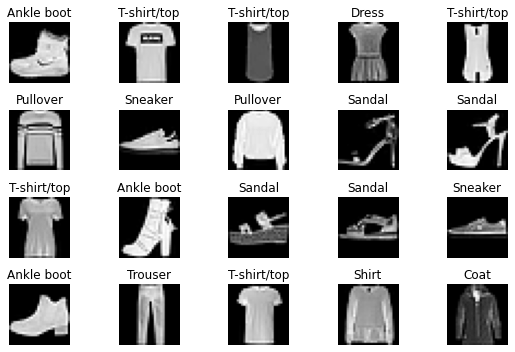

In [83]:
# Define class names as given in Fashion MNIST data
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Rescale pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Plot some examples from the dataset
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(8, 5))
axes = axes.flatten()
for i in range(len(axes)):
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].set_title(class_names[y_train[i]])
    axes[i].axis('off')
plt.tight_layout()
plt.show()

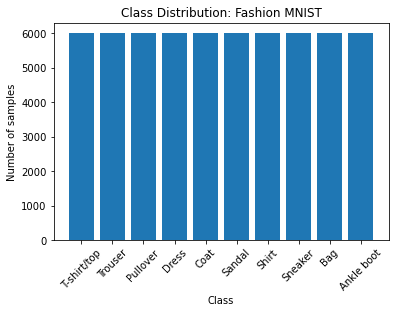

In [84]:
# Count the number of samples in each class
class_counts = np.bincount(y_train)
# Plot a bar chart of the class distribution
plt.bar(range(len(class_names)), class_counts)
plt.xticks(range(len(class_names)), class_names, rotation=45)
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.title('Class Distribution: Fashion MNIST')
plt.show()

**Class distribution**: The bar chart of the class distribution shows that the classes are evenly represented in the dataset. 

### Data Preprocessing
**Image Flattening**: In a Multilayer Perceptron (MLP) neural network, the input layer consists of a set of neurons that receive the input data. For image classification tasks, such as the Fashion MNIST dataset, the input data consists of images that are typically represented as 2D arrays of pixel values. However, MLPs require their input to be in the form of a 1D array or a vector.

- The reason for flattening the images is that each pixel value in the image represents a separate input feature to the MLP. Flattening the images into a 1D array ensures that each input neuron in the input layer receives the pixel value for a specific feature. This allows the MLP to learn the relationships between the individual pixel values and the output class labels. The following figure provides an example of flattening 2D image into 1D column vector:
<div style="text-align:center">
<img src="https://github.com/kashifliaqat/Data_Science_and_Machine-Learning/raw/main/Images/flatten.png" alt="Image Flattening" width="300" height="200">
</div>

Image Source: [Towards Data Science](https://towardsdatascience.com/the-most-intuitive-and-easiest-guide-for-convolutional-neural-network-3607be47480)

**One-Hot Encoding**: The Fashion MNIST dataset is labeled with a single class label from 10 possible categories, ranging from 0 to 9. However, these class labels cannot be used directly as input to a machine learning model, as they are categorical variables. One hot encoding is a way to transform these labels into a numerical format that can be used as input to the model. In one hot encoding, each class label is represented as a binary vector with length equal to the number of classes. Each element in the vector corresponds to a single class, and is set to 1 if the image belongs to that class, and 0 otherwise. The following figure provides an example of One-Hot Encoding:

<div style="text-align:center">
<img src="https://github.com/kashifliaqat/Data_Science_and_Machine-Learning/raw/main/Images/one_hot.png" alt="One-Hot Encoding" width="400" height="100">
</div>

Image Source: [International Journal of Environmental Research and Public Health](https://www.researchgate.net/publication/344409939_Predictive_Modeling_for_Occupational_Safety_Outcomes_and_Days_Away_from_Work_Analysis_in_Mining_Operations)



In [85]:
# Flatten the training images (1D coloumn vectors). 
flat_train_X = []
# One hot encode the training labels
onehot_train_y = []
for x, y in zip(X_train, y_train):
    flat_train_X.append(x.flatten().reshape(784, 1))
    temp_vec = np.zeros((10, 1))
    temp_vec[y][0] = 1.0
    onehot_train_y.append(temp_vec)

# Flatten the testing images (1D coloumn vectors). 
flat_test_X = []
# One hot encode the testing labels
onehot_test_y = []

for x, y in zip(X_test, y_test):
    flat_test_X.append(x.flatten().reshape(784, 1))
    temp_vec = np.zeros((10, 1))
    temp_vec[y] = 1.0
    onehot_test_y.append(temp_vec)

### Neural Network Architecture
**MultiLayer Perceptron**: A multiLayer perceptron (MLP) consists of one or more hidden layers of nodes between the input and output layers. Each node in the hidden layers uses a non-linear activation function to compute a weighted sum of its inputs, which are the output values of the previous layer. During training, the network adjusts the weights and biases of the connections between nodes to minimize the difference between the network's predicted output and the true output. MLPs are capable of modeling complex non-linear relationships between inputs and outputs. The following figure provides an example of MLP architecture:
<div style="text-align:center">
<img src="https://github.com/kashifliaqat/Data_Science_and_Machine-Learning/raw/main/Images/MLP.png" alt="MultiLayer Perceptron" width="300" height="200">
</div>

Image Source: [Medium](https://miro.medium.com/v2/resize:fit:1000/1*3fA77_mLNiJTSgZFhYnU0Q.png)

#### Implementation
- The network architecture consists of an input layer, multiple hidden layers, and an output layer. The number of nodes in each layer is defined by the `layers` parameter. The weights and biases for the network are initialized using the `initialize_weights()` method, which uses random values multiplied by a scaling factor based on the size of the previous layer. The activation function used in this implementation is the sigmoid function, which is defined by the `sigmoid()` method.
- The `mse()` and `MSE()` methods calculate the mean squared error (MSE) of the output of the network. The `mse()` method calculates the MSE for a single data point, while the `MSE()` method calculates the average MSE across all data points in a dataset.
- The `forward_pass()` method performs a forward pass through the network given a set of input values. It returns the pre-activation and post-activation values for each layer in the network. The `predict()` method uses the `forward_pass()` method to predict the class of a given input value.
- The `train()` method trains the network using stochastic gradient descent. It takes as input the training data, the learning rate `alpha`, and the number of epochs to train for. The method loops over each training data point and performs forward and backward propagation to update the weights and biases of the network. It prints the cost after each epoch, which is the average MSE across all training data points.

In [86]:
class DeepNeuralNet():
    """
    A neural network class for multi-class classification using deep learning.

    Attributes:
    -----------
    layers : list
        A list containing the number of neurons in each layer, including the input and output layers.
    W : list
        A list of weight matrices for each layer in the network.
    B : list
        A list of bias vectors for each layer in the network.
    errors_ : list
        A list of errors that occur during training.

    Methods:
    --------
    initialize_weights():
        Initializes the weights and biases for the neural network.

    sigmoid(z):
        Calculates the sigmoid function value of the input.

    d_sigmoid(z):
        Calculates the derivative of the sigmoid function with respect to the input.

    mse(a, y):
        Calculates the mean squared error between the predicted and actual outputs.

    MSE(W, B, X, y):
        Calculates the mean squared error for a set of input data and corresponding targets.

    forward_pass(W, B, xi, predict_vector=False):
        Calculates the preactivation and postactivation values for each layer in the network.

    train(X_train, y_train, alpha=0.1, epochs=2):
        Trains the neural network on a set of input data and corresponding targets.

    predict(xi):
        Predicts the class of a given input vector.
    """
    def __init__(self, layers = [784, 60, 60, 10]):
        """
        Initializes a DeepNeuralNet instance.

        Parameters:
        -----------
        layers : list
            A list containing the number of neurons in each layer, including the input, hidden, and output layers.
        """
        self.layers = layers
        self.W, self.B = self.initialize_weights()

    def initialize_weights(self):
        """
        Initializes the weights and biases for the neural network.
        
        Returns:
        W: List of weight matrices for each layer in the network.
        B: List of bias vectors for each layer in the network.
        """
        # Initialize the weight and bias matrices for the input layer
        W = [[0.0]]
        B = [[0.0]]
        for i in range(1, len(self.layers)):
            # Initialize the weight matrix for the current layer using random values
            # multiplied by a scaling factor based on the size of the previous layer
            w_temp = np.random.randn(self.layers[i], self.layers[i-1])*np.sqrt(2/self.layers[i-1])
            # Initialize the bias vector for the current layer using random values
            # multiplied by a scaling factor based on the size of the previous layer
            b_temp = np.random.randn(self.layers[i], 1)*np.sqrt(2/self.layers[i-1])
            W.append(w_temp)
            B.append(b_temp)
        return W, B

    def sigmoid(self, z):
        """
        Calculates the sigmoid function value of the input.

        Parameters:
        -----------
        z : float
            The input value.

        Returns:
        --------
        The sigmoid function value of the input.
        """
        return 1.0/(1.0+np.exp(-z))

    def d_sigmoid(self, z):
        """
        Calculates the derivative of the sigmoid function with respect to the input.

        Parameters:
        -----------
        z : float
            The input value.

        Returns:
        --------
        The derivative of the sigmoid function with respect to the input.
        """
        return self.sigmoid(z)*(1.0 - self.sigmoid(z))
    
    def mse(self, a, y):
        """
        Computes the mean squared error of the predicted output a and the actual output y.
        
        Parameters:
        a: The predicted output.
        y: The actual output.
        
        Returns:
        The mean squared error between a and y.
        """
        return .5*sum((a[i] - y[i])**2 for i in range(10))[0]

    def MSE(self, W, B, X, y):
        """
        Computes the mean squared error for a given set of parameters and inputs.
        
        Parameters:
        W (list of numpy arrays): The weight matrices.
        B (list of numpy arrays): The bias vectors.
        X (numpy array): The input data.
        y (numpy array): The output data.
        
        Returns:
        The mean squared error for the given set of parameters and inputs.
        """
        cost = 0.0
        m = 0
        for xi, yi in zip(X, y):
            a = self.forward_pass(W, B, xi, predict_vector = True)
            cost += self.mse(a, yi)
            m+=1
        return cost/m
    
    def forward_pass(self, W, B, xi, predict_vector = False):
        """
        Computes the preactivation and postactivation values of each layer in the neural network for a given input.
        
        Parameters:
        W (list of numpy arrays): The weight matrices.
        B (list of numpy arrays): The bias vectors.
        xi (numpy array): The input to the neural network.
        predict_vector (bool): Whether to return only the output of the last layer or the preactivation and postactivation values of all layers.
        
        Returns:
        If predict_vector is False, returns a tuple (Z, A) where Z is a list of preactivation values and A is a list of postactivation values.
        If predict_vector is True, returns only the output of the last layer.
        """
        Z = [[0.0]]
        A = [xi]
        L = len(W) - 1
        for i in range(1, L + 1):
            z = W[i] @ A[i-1] + B[i]
            Z.append(z)
            
            a = self.sigmoid(z)
            A.append(a)
            
        if predict_vector == False:
            return Z, A
        else:
            return A[-1]
        
    def train(self, X_train, y_train, alpha = 0.1, epochs = 2):
        """Train the neural network on the input data.

        Parameters:
            X_train (numpy.ndarray): The input data.
            y_train (numpy.ndarray): The target output data.
            alpha (float, optional): Learning rate. Defaults to 0.1.
            epochs (int, optional): The number of epochs to train for. Defaults to 2.

        Returns:
            None
        """
        # Print the initial mean squared error
        self.errors_ = [self.MSE(self.W, self.B, X_train, y_train)]
        print(f"Starting Cost (MSE) = {self.errors_[0]}")

        # Find sample size
        sample_size = len(X_train)

        # Find the number of non-input layers.
        L = len(self.layers) - 1

        # Perform stochastic gradient descent for each epoch 
        for k in range(epochs):
            # Loop over each (xi, yi) training pair of data.
            for xi, yi in zip(X_train, y_train):
                # Use the forward pass function defined before
                # and find the preactivation and postactivation values.
                Z, A = self.forward_pass(self.W, self.B, xi)
                # Store the errors in a dictionary for clear interpretation
                # of computation of these values.
                deltas = dict()

                # Compute the output error 
                output_error = (A[L] - yi)*self.d_sigmoid(Z[L])
                deltas[L] = output_error
                # Loop from L-1 to 1. Recall the right entry of the range function 
                # is non-inclusive. 
                for i in range(L-1, 0, -1):
                    # Compute the node errors at each hidden layer
                    deltas[i] = (self.W[i+1].T @ deltas[i+1])*self.d_sigmoid(Z[i])
                # Loop over each hidden layer and the output layer to perform gradient 
                # descent. 
                for i in range(1, L+1):
                    self.W[i] -= alpha*deltas[i] @ A[i-1].T
                    self.B[i] -= alpha*deltas[i]

            # Print: Training cost after an Epoch
            self.errors_.append(self.MSE(self.W, self.B, X_train, y_train))   
            print(f"Cost (MSE) after Epoch {k + 1}: = {self.errors_[-1]}")
    

    def predict(self, xi):
        """
        Predict the class label for a single input vector.

        Parameters:
        -----------
        xi : array-like, shape (n_features,)
            Input vector for which the class label needs to be predicted.

        Returns:
        --------
        int
            Predicted class label for the given input vector.
        """
        depth = len(self.layers)
        _, A = self.forward_pass(self.W, self.B, xi)
        return np.argmax(A[-1])

### Initialization and Training
1. Initialize the network by providing the desired architecture (number of layers and size of each layer)
2. Train the network on training set
3. Plot training loss

In [87]:
# Initialize a deep neural network with following architecture
# Input Nodes: 784 (28x28)
# Three hidden layers: 240, 120, 60 nodes respectively
# Output Nodes: 10 (10 class classification problem - Fashion MNIST)
DNN = DeepNeuralNet(layers = [784, 240, 120, 60, 10])

# Check the mean squared error before training 
#print(f"Cost: MSE before training = {DNN.MSE(DNN.W, DNN.B, flat_train_X, onehot_train_y)} \n")
# Train your network with stochastic gradient descent!
DNN.train(flat_train_X, onehot_train_y, alpha = 0.1, epochs = 12)

Starting Cost (MSE) = 1.2167316074286962
Cost (MSE) after Epoch 1: = 0.11849537582713293
Cost (MSE) after Epoch 2: = 0.10952916391033073
Cost (MSE) after Epoch 3: = 0.10319862858744382
Cost (MSE) after Epoch 4: = 0.09994972843127906
Cost (MSE) after Epoch 5: = 0.09964162295877362
Cost (MSE) after Epoch 6: = 0.09749510472781514
Cost (MSE) after Epoch 7: = 0.09516366863320894
Cost (MSE) after Epoch 8: = 0.09316596870589583
Cost (MSE) after Epoch 9: = 0.08906878548863605
Cost (MSE) after Epoch 10: = 0.08630288575939302
Cost (MSE) after Epoch 11: = 0.08370503345451322
Cost (MSE) after Epoch 12: = 0.08342932153790843


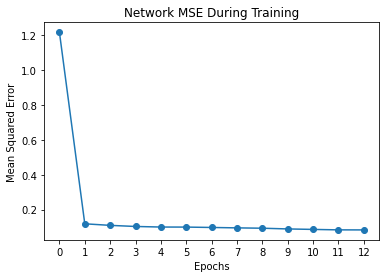

In [88]:
# Visualize the mean squared error over the training process 
plt.figure(figsize = (6, 4))
Epochs = range(len(DNN.errors_))
plt.plot(Epochs, DNN.errors_, marker = "o")
plt.xticks(Epochs)
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Network MSE During Training")
plt.show()

- The loss plot shows that after few epochs there isn't significant reduction in loss. 

### Performance Evaluation 
1. Calculate the testing accuracy
2. Visualize few randomly chosen images from the test set and compare actual vs predicted

In [89]:
# Compute and print the classification accuracy on test data 
accuracy = sum([int(DNN.predict(x) == y) for x, y in zip(flat_test_X, y_test)])/len(onehot_test_y)
print("Testing Accuracy: ", accuracy)

Testing Accuracy:  0.8574


Predicted Product: Dress
Actual Product: Dress


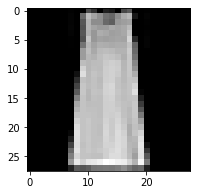

Predicted Product: T-shirt/top
Actual Product: T-shirt/top


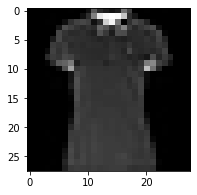

Predicted Product: Sneaker
Actual Product: Sneaker


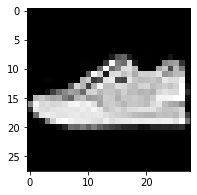

Predicted Product: T-shirt/top
Actual Product: T-shirt/top


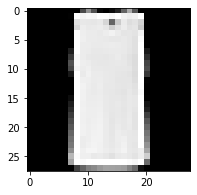

Predicted Product: Trouser
Actual Product: Trouser


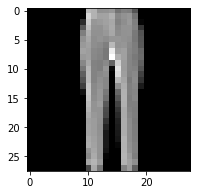

Predicted Product: Sandal
Actual Product: Sandal


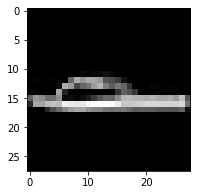

Predicted Product: Bag
Actual Product: Bag


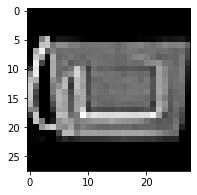

Predicted Product: Trouser
Actual Product: Trouser


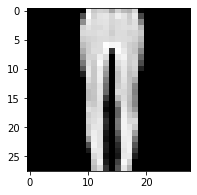

Predicted Product: Pullover
Actual Product: Shirt


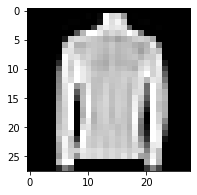

Predicted Product: Ankle boot
Actual Product: Ankle boot


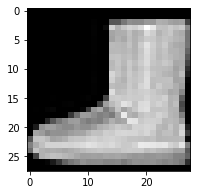

In [94]:
# Visualize few randomly chosen images from the test set and compare actual vs predicted
for a in range(10):
    # generate random int
    i = np.random.randint(0, len(flat_test_X))
    # make rand prediction
    prediction = DNN.predict(flat_test_X[i])
    # compare
    print(f"Predicted Product: {class_names[prediction]}")
    print(f"Actual Product: {class_names[np.argmax(onehot_test_y[i])]}")
    # plot the figure
    plt.figure(figsize=(3, 3))
    plt.imshow(X_test[i], cmap="gray")
    plt.show()

### Model Tuning
The model's hyperparameters can be tuned to enhance the performance. Here we will present the example of `learning rate`. Different values of `learning rate` will be used to calculate the `accuracy` to find the best learning rate. Previously, the learning rate was decided using hit and try but here we'll present a more thorough method of tuning a hyperparameter.
- Note: The tuning code uses fewer epochs compared to the previoulsy trained model. Fewer epochs will reduce computational time required for tuning. 

In [91]:
# the following code runs the network for different learning rates and calculates accuracy. 
lr_values = [0.001, 0.01, 0.1, 1]  # different values of learning rate to try
accuracy_values = []  # to store the accuracy for each learning rate value
# loop over each learning_rate value
for alpha in lr_values:
    DNN2 = DeepNeuralNet(layers = [784, 240, 120, 60, 10])
    print("Learning Rate:", alpha)
    DNN2.train(flat_train_X, onehot_train_y, alpha=alpha, epochs=2)
    accuracy = sum([int(DNN2.predict(x) == y) for x, y in zip(flat_test_X, y_test)])/len(onehot_test_y)
    accuracy_values.append(accuracy)

Learning Rate: 0.001
Starting Cost (MSE) = 1.81982294287997
Cost (MSE) after Epoch 1: = 0.4477894123014131
Cost (MSE) after Epoch 2: = 0.4443723144432675
Learning Rate: 0.01
Starting Cost (MSE) = 1.2302976022630676
Cost (MSE) after Epoch 1: = 0.26893606983881113
Cost (MSE) after Epoch 2: = 0.17583913091704845
Learning Rate: 0.1
Starting Cost (MSE) = 1.4474569412406801
Cost (MSE) after Epoch 1: = 0.11633617357052091
Cost (MSE) after Epoch 2: = 0.10645983614826851
Learning Rate: 1
Starting Cost (MSE) = 1.134280157749107
Cost (MSE) after Epoch 1: = 0.1354055382428077
Cost (MSE) after Epoch 2: = 0.12536494737616022


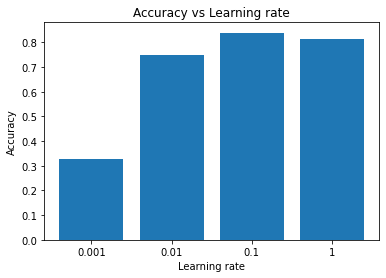

In [92]:
# Create a bar graph. Each bar represents the accuracy value for a different learning rate.
plt.bar(range(len(accuracy_values)), accuracy_values)
plt.xticks(range(len(lr_values)), lr_values)
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Learning rate')
plt.show()

- The bar chart shows that the best `accuracy` is achieved using `Learning rate = 0.1`. We have already trained our previous model using this learning rate.

## Conclusion
Here we implemented a multilayer perceptron from scratch to classify the Fashion MNIST data. The data was scaled and preprocessed before training using techniques such as image flattening and one-hot encoding. The following are the findings:
- The MLP is able to achieve a testing accuracy of approximately 86%. 
- 10 random images from the testset were used as a comparison, the model made 9 correct prediction out of 10 images (justifying the 86% accuracy). 
- The hyperparameter tuning showed that there is an optimal value for the hyperparameter `learning rate`. 
- The performance of the model can be further enhanced by optimizing the number of hidden layers and nodes in each layer.